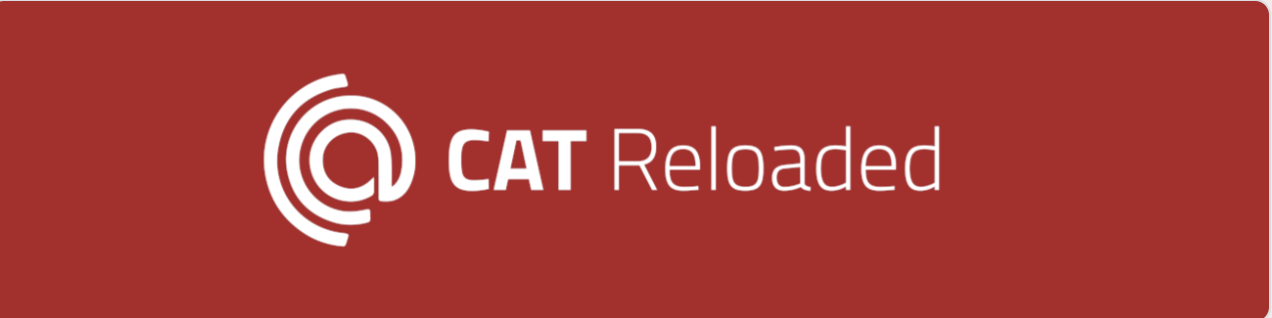

In [1]:
from IPython.display import Image 
Image("E:\\Documents\\CatReloaded-AI Roadmap\\Tasks_To_Join\\Cat_Reloaded_Img.png")  

# <center><h1 style = "font-size: 30px"> **Data Cleaning**


### Dictionary:

1. Explore the Data
2. Check for NaNs and Duplicates
3. Clean the Data as much as you can
4. Drop columns with too many NaNs
5. Rename the columns into a proper naming style
6. Handle missing values in column Q1: GOING OUT? 
Hint : Fill missing values with mode
7. Handle missing values in column Gender
    
    Hint : Fill missing values with mode
    
8. Handle missing values in column Age
    
    Hint : Fill missing values with mean
    
9. Show the distribution of the ages after cleaning.

10. Visualize top 10 loved and hated candies

### <span style="font-size: 20px" > **Explore Data**

In [ ]:
#* Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#* convert the excel file to a pandas dataframe 
df = pd.read_excel("E:\\Documents\\CatReloaded-AI Roadmap\\Tasks_To_Join\\Data_Cleaning\\candyhierarchy2017.xlsx")

pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', 5)    
df


c:\Users\ASUD Vivo\AppData\Local\Programs\Python\Python314\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Internal ID,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,Q6 | Bonkers (the candy),Q6 | Bonkers (the board game),Q6 | Bottle Caps,Q6 | Box'o'Raisins,Q6 | Broken glow stick,Q6 | Butterfinger,Q6 | Cadbury Creme Eggs,Q6 | Candy Corn,Q6 | Candy that is clearly just the stuff given out for free at restaurants,Q6 | Caramellos,"Q6 | Cash, or other forms of legal tender",Q6 | Chardonnay,Q6 | Chick-o-Sticks (we don’t know what that is),Q6 | Chiclets,Q6 | Coffee Crisp,Q6 | Creepy Religious comics/Chick Tracts,Q6 | Dental paraphenalia,Q6 | Dots,Q6 | Dove Bars,Q6 | Fuzzy Peaches,Q6 | Generic Brand Acetaminophen,Q6 | Glow sticks,Q6 | Goo Goo Clusters,Q6 | Good N' Plenty,Q6 | Gum from baseball cards,Q6 | Gummy Bears straight up,Q6 | Hard Candy,Q6 | Healthy Fruit,Q6 | Heath Bar,Q6 | Hershey's Dark Chocolate,Q6 | Hershey’s Milk Chocolate,Q6 | Hershey's Kisses,Q6 | Hugs (actual physical hugs),Q6 | Jolly Rancher (bad flavor),Q6 | Jolly Ranchers (good flavor),Q6 | JoyJoy (Mit Iodine!),Q6 | Junior Mints,Q6 | Senior Mints,Q6 | Kale smoothie,Q6 | Kinder Happy Hippo,Q6 | Kit Kat,Q6 | LaffyTaffy,Q6 | LemonHeads,Q6 | Licorice (not black),Q6 | Licorice (yes black),Q6 | Lindt Truffle,Q6 | Lollipops,Q6 | Mars,Q6 | Maynards,Q6 | Mike and Ike,Q6 | Milk Duds,Q6 | Milky Way,Q6 | Regular M&Ms,Q6 | Peanut M&M’s,Q6 | Blue M&M's,Q6 | Red M&M's,Q6 | Green Party M&M's,Q6 | Independent M&M's,Q6 | Abstained from M&M'ing.,Q6 | Minibags of chips,Q6 | Mint Kisses,Q6 | Mint Juleps,Q6 | Mr. Goodbar,Q6 | Necco Wafers,Q6 | Nerds,Q6 | Nestle Crunch,Q6 | Now'n'Laters,Q6 | Peeps,Q6 | Pencils,Q6 | Pixy Stix,Q6 | Real Housewives of Orange County Season 9 Blue-Ray,Q6 | Reese’s Peanut Butter Cups,Q6 | Reese's Pieces,Q6 | Reggie Jackson Bar,Q6 | Rolos,Q6 | Sandwich-sized bags filled with BooBerry Crunch,Q6 | Skittles,Q6 | Smarties (American),Q6 | Smarties (Commonwealth),Q6 | Snickers,Q6 | Sourpatch Kids (i.e. abominations of nature),Q6 | Spotted Dick,Q6 | Starburst,Q6 | Sweet Tarts,Q6 | Swedish Fish,Q6 | Sweetums (a friend to diabetes),Q6 | Take 5,Q6 | Tic Tacs,Q6 | Those odd marshmallow circus peanut things,Q6 | Three Musketeers,Q6 | Tolberone something or other,Q6 | Trail Mix,Q6 | Twix,"Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein",Q6 | Vicodin,Q6 | Whatchamacallit Bars,Q6 | White Bread,Q6 | Whole Wheat anything,Q6 | York Peppermint Patties,Q7: JOY OTHER,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"
0,90258773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,90272821,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,JOY,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,MEH,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,JOY,JOY,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,Mounds,NaN,Bottom line is Twix is really the only candy w...,White and gold,NaN,Sunday,Na

In [3]:
#* shape of the dataframe
df.shape

(2460, 120)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Columns: 120 entries, Internal ID to Click Coordinates (x, y)
dtypes: float64(4), int64(1), object(115)
memory usage: 2.3+ MB


In [5]:
df.sample(5)

,Internal ID,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,Q6 | Bonkers (the candy),Q6 | Bonkers (the board game),Q6 | Bottle Caps,Q6 | Box'o'Raisins,Q6 | Broken glow stick,Q6 | Butterfinger,Q6 | Cadbury Creme Eggs,Q6 | Candy Corn,Q6 | Candy that is clearly just the stuff given out for free at restaurants,Q6 | Caramellos,"Q6 | Cash, or other forms of legal tender",Q6 | Chardonnay,Q6 | Chick-o-Sticks (we don’t know what that is),Q6 | Chiclets,Q6 | Coffee Crisp,Q6 | Creepy Religious comics/Chick Tracts,Q6 | Dental paraphenalia,Q6 | Dots,Q6 | Dove Bars,Q6 | Fuzzy Peaches,Q6 | Generic Brand Acetaminophen,Q6 | Glow sticks,Q6 | Goo Goo Clusters,Q6 | Good N' Plenty,Q6 | Gum from baseball cards,Q6 | Gummy Bears straight up,Q6 | Hard Candy,Q6 | Healthy Fruit,Q6 | Heath Bar,Q6 | Hershey's Dark Chocolate,Q6 | Hershey’s Milk Chocolate,Q6 | Hershey's Kisses,Q6 | Hugs (actual physical hugs),Q6 | Jolly Rancher (bad flavor),Q6 | Jolly Ranchers (good flavor),Q6 | JoyJoy (Mit Iodine!),Q6 | Junior Mints,Q6 | Senior Mints,Q6 | Kale smoothie,Q6 | Kinder Happy Hippo,Q6 | Kit Kat,Q6 | LaffyTaffy,Q6 | LemonHeads,Q6 | Licorice (not black),Q6 | Licorice (yes black),Q6 | Lindt Truffle,Q6 | Lollipops,Q6 | Mars,Q6 | Maynards,Q6 | Mike and Ike,Q6 | Milk Duds,Q6 | Milky Way,Q6 | Regular M&Ms,Q6 | Peanut M&M’s,Q6 | Blue M&M's,Q6 | Red M&M's,Q6 | Green Party M&M's,Q6 | Independent M&M's,Q6 | Abstained from M&M'ing.,Q6 | Minibags of chips,Q6 | Mint Kisses,Q6 | Mint Juleps,Q6 | Mr. Goodbar,Q6 | Necco Wafers,Q6 | Nerds,Q6 | Nestle Crunch,Q6 | Now'n'Laters,Q6 | Peeps,Q6 | Pencils,Q6 | Pixy Stix,Q6 | Real Housewives of Orange County Season 9 Blue-Ray,Q6 | Reese’s Peanut Butter Cups,Q6 | Reese's Pieces,Q6 | Reggie Jackson Bar,Q6 | Rolos,Q6 | Sandwich-sized bags filled with BooBerry Crunch,Q6 | Skittles,Q6 | Smarties (American),Q6 | Smarties (Commonwealth),Q6 | Snickers,Q6 | Sourpatch Kids (i.e. abominations of nature),Q6 | Spotted Dick,Q6 | Starburst,Q6 | Sweet Tarts,Q6 | Swedish Fish,Q6 | Sweetums (a friend to diabetes),Q6 | Take 5,Q6 | Tic Tacs,Q6 | Those odd marshmallow circus peanut things,Q6 | Three Musketeers,Q6 | Tolberone something or other,Q6 | Trail Mix,Q6 | Twix,"Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein",Q6 | Vicodin,Q6 | Whatchamacallit Bars,Q6 | White Bread,Q6 | Whole Wheat anything,Q6 | York Peppermint Patties,Q7: JOY OTHER,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"
460,90274105,No,Male,42,Usa,Ca,MEH,MEH,JOY,DESPAIR,MEH,MEH,DESPAIR,JOY,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,JOY,DESPAIR,JOY,MEH,MEH,DESPAIR,DESPAIR,MEH,JOY,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,JOY,MEH,MEH,JOY,JOY,JOY,JOY,DESPAIR,MEH,JOY,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,JOY,MEH,JOY,MEH,DESPAIR,JOY,MEH,JOY,MEH,MEH,MEH,JOY,JOY,JOY,JOY,JOY,JOY,JOY,MEH,JOY,MEH,DESPAIR,JOY,DESPAIR,MEH,JOY,MEH,DESPAIR,MEH,MEH,DESPAIR,JOY,JOY,MEH,JOY,DESPAIR,JOY,JOY,JOY,JOY,JOY,MEH,JOY,JOY,JOY,MEH,MEH,MEH,DESPAIR,JOY,JOY,MEH,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,NaN,NaN,NaN,White and gold,NaN,Friday,NaN,NaN,NaN,NaN,NaN
2088,90286139,No,Male,46,USA,CA,JOY,MEH,JOY,JOY,JOY,JOY,JOY,DESPAIR,DESPAIR,MEH,JOY,MEH,MEH,JOY,JOY,JOY,MEH,JOY,MEH,JOY,DESPAIR,JOY,JOY,JOY,DESPAIR,JOY,JOY,JOY,MEH,JOY,MEH,DESPAIR,JOY,JOY,JOY,JOY,DESPAIR,MEH,JOY,JOY,JOY,MEH,DESPAIR,JOY,JOY,JOY,JOY,JOY,JOY,JOY,MEH,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,MEH,MEH,MEH,JOY,MEH,JOY,JOY,JOY,JOY,MEH,MEH,JOY,DESPAIR,JOY,DESPAIR,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,MEH,JOY,JOY,MEH,JOY,JOY,DESPAIR,JOY,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,JOY,NaN,NaN,"No ""Healthy Alternatives"" on Halloween!",NaN,NaN,Friday,NaN,1.0,NaN,NaN,"(78, 4)"
1072,90277182,No,Male,36,United States,Pennsylvania,JOY,MEH,JOY,MEH,JOY

In [6]:
pd.set_option('display.max_rows', 8)
pd.set_option('display.max_columns', None)
df.describe()

,Internal ID,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo]
count,2.460000e+03,85.0,1362.0,99.0,67.0
mean,9.028016e+07,1.0,1.0,1.0,1.0
std,7.435532e+03,0.0,0.0,0.0,0.0
min,9.025877e+07,1.0,1.0,1.0,1.0
25%,9.027520e+07,1.0,1.0,1.0,1.0
50%,9.027780e+07,1.0,1.0,1.0,1.0
75%,9.028242e+07,1.0,1.0,1.0,1.0
max,9.031480e+07,1.0,1.0,1.0,1.0


In [7]:
pd.set_option('display.max_rows', 11)
df.describe(include="all")

,Internal ID,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,Q6 | Bonkers (the candy),Q6 | Bonkers (the board game),Q6 | Bottle Caps,Q6 | Box'o'Raisins,Q6 | Broken glow stick,Q6 | Butterfinger,Q6 | Cadbury Creme Eggs,Q6 | Candy Corn,Q6 | Candy that is clearly just the stuff given out for free at restaurants,Q6 | Caramellos,"Q6 | Cash, or other forms of legal tender",Q6 | Chardonnay,Q6 | Chick-o-Sticks (we don’t know what that is),Q6 | Chiclets,Q6 | Coffee Crisp,Q6 | Creepy Religious comics/Chick Tracts,Q6 | Dental paraphenalia,Q6 | Dots,Q6 | Dove Bars,Q6 | Fuzzy Peaches,Q6 | Generic Brand Acetaminophen,Q6 | Glow sticks,Q6 | Goo Goo Clusters,Q6 | Good N' Plenty,Q6 | Gum from baseball cards,Q6 | Gummy Bears straight up,Q6 | Hard Candy,Q6 | Healthy Fruit,Q6 | Heath Bar,Q6 | Hershey's Dark Chocolate,Q6 | Hershey’s Milk Chocolate,Q6 | Hershey's Kisses,Q6 | Hugs (actual physical hugs),Q6 | Jolly Rancher (bad flavor),Q6 | Jolly Ranchers (good flavor),Q6 | JoyJoy (Mit Iodine!),Q6 | Junior Mints,Q6 | Senior Mints,Q6 | Kale smoothie,Q6 | Kinder Happy Hippo,Q6 | Kit Kat,Q6 | LaffyTaffy,Q6 | LemonHeads,Q6 | Licorice (not black),Q6 | Licorice (yes black),Q6 | Lindt Truffle,Q6 | Lollipops,Q6 | Mars,Q6 | Maynards,Q6 | Mike and Ike,Q6 | Milk Duds,Q6 | Milky Way,Q6 | Regular M&Ms,Q6 | Peanut M&M’s,Q6 | Blue M&M's,Q6 | Red M&M's,Q6 | Green Party M&M's,Q6 | Independent M&M's,Q6 | Abstained from M&M'ing.,Q6 | Minibags of chips,Q6 | Mint Kisses,Q6 | Mint Juleps,Q6 | Mr. Goodbar,Q6 | Necco Wafers,Q6 | Nerds,Q6 | Nestle Crunch,Q6 | Now'n'Laters,Q6 | Peeps,Q6 | Pencils,Q6 | Pixy Stix,Q6 | Real Housewives of Orange County Season 9 Blue-Ray,Q6 | Reese’s Peanut Butter Cups,Q6 | Reese's Pieces,Q6 | Reggie Jackson Bar,Q6 | Rolos,Q6 | Sandwich-sized bags filled with BooBerry Crunch,Q6 | Skittles,Q6 | Smarties (American),Q6 | Smarties (Commonwealth),Q6 | Snickers,Q6 | Sourpatch Kids (i.e. abominations of nature),Q6 | Spotted Dick,Q6 | Starburst,Q6 | Sweet Tarts,Q6 | Swedish Fish,Q6 | Sweetums (a friend to diabetes),Q6 | Take 5,Q6 | Tic Tacs,Q6 | Those odd marshmallow circus peanut things,Q6 | Three Musketeers,Q6 | Tolberone something or other,Q6 | Trail Mix,Q6 | Twix,"Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein",Q6 | Vicodin,Q6 | Whatchamacallit Bars,Q6 | White Bread,Q6 | Whole Wheat anything,Q6 | York Peppermint Patties,Q7: JOY OTHER,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"
count,2.460000e+03,2350,2419,2376.0,2396,2360,1713,1726,1788,1502,1468,1454,1695,1772,1754,1778,1777,1782,1769,1708,1780,1717,1514,1749,1607,1756,1768,1731,1758,1637,1729,1763,1581,1726,1744,1763,1765,1766,1748,1787,1788,1782,1747,1766,1765,1434,1762,1518,1716,1515,1786,1724,1730,1774,1775,1742,1769,1735,1436,1731,1767,1772,1785,1789,1733,1731,1696,1647,1518,1736,1684,1649,1720,1716,1737,1762,1643,1750,1751,1738,1707,1781,1769,1446,1746,1684,1754,1735,1559,1770,1722,1578,1767,1752,1745,1458,1543,1746,1724,1752,1754,1752,1770,1668,1671,1637,1703,1713,1755,911,717,386,1716,9,1735,85.0,1362.0,99.0,67.0,1605
unique,NaN,2,4,106.0,128,511,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,867,685,385,2,1,2,NaN,NaN,NaN,NaN,952
top,NaN,No,Male,40.0,USA,California,JOY,DESPAIR,JOY,DESPAIR,MEH,MEH,MEH,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,JOY,JOY,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,JOY,MEH,DESPAIR,JOY,JOY,JOY,JOY,DESPAIR,DESPAIR,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,JOY,MEH,MEH,MEH,DESPAIR,JOY,MEH,JOY,MEH,MEH,JOY,JOY,JOY,JOY,JOY,JOY,JOY,

### <span style = "font-size: 20px"> **Checking for NaNs and Duplicates** 

#### <span style = "font-size:18px"> **NaNs** 

In [8]:
#* check for missing values in each column
df.isnull().sum()

Internal ID                    0
Q1: GOING OUT?               110
Q2: GENDER                    41
Q3: AGE                       84
Q4: COUNTRY                   64
                            ... 
Q12: MEDIA [Daily Dish]     2375
Q12: MEDIA [Science]        1098
Q12: MEDIA [ESPN]           2361
Q12: MEDIA [Yahoo]          2393
Click Coordinates (x, y)     855
Length: 120, dtype: int64

In [9]:
(df.isnull().mean() * 100).round(2)


Internal ID                  0.00
Q1: GOING OUT?               4.47
Q2: GENDER                   1.67
Q3: AGE                      3.41
Q4: COUNTRY                  2.60
                            ...  
Q12: MEDIA [Daily Dish]     96.54
Q12: MEDIA [Science]        44.63
Q12: MEDIA [ESPN]           95.98
Q12: MEDIA [Yahoo]          97.28
Click Coordinates (x, y)    34.76
Length: 120, dtype: float64

In [10]:
type((df.isnull().mean() * 100).map(lambda x: f"{round(x, 2)}%").sort_values(ascending=False))

pandas.core.series.Series

In [11]:
Nan_columns_percentage = pd.DataFrame( (df.isnull().mean() * 100).map(lambda x: f"{round(x, 2)}%").sort_values(ascending=False))
Nan_columns_percentage.columns = ['Percentage of NaN values']


#### <span style = "font-size : 18px"> **Duplicates**

In [12]:
# check first for any duplicate rows :)
df.duplicated().any()    #! No duplicate rows found

np.False_

In [13]:
df.duplicated().describe()

count      2460
unique        1
top       False
freq       2460
dtype: object

### <span style = "font-size: 20px"> **Data Cleaning** 

#### <span style="font-size: 18px"> **Renameing Columns**

In [14]:

df.columns = df.columns.str.strip().str.title().str.replace(" ", "").str.replace("[^a-zA-Z]", "", regex=True).str.replace('^Q', '', regex=True)
df.columns

Index(['InternalId', 'GoingOut', 'Gender', 'Age', 'Country',
       'StateProvinceCountyEtc', 'GrandBar',
       'AnonymousBrownGlobsThatComeInBlackAndOrangeWrappersAKAMaryJanes',
       'AnyFullSizedCandyBar', 'BlackJacks',
       ...
       'DespairOther', 'OtherComments', 'Dress', 'Unnamed', 'Day',
       'MediaDailyDish', 'MediaScience', 'MediaEspn', 'MediaYahoo',
       'ClickCoordinatesXY'],
      dtype='object', length=120)

In [15]:
df.rename(columns={'AnonymousBrownGlobsThatComeInBlackAndOrangeWrappersAKAMaryJanes': 'mary_janes'}, inplace=True)

In [16]:
df.rename(columns={"VialsOfPureHighFructoseCornSyrupForMainLiningIntoYourVein":'Restaurant_Candy', "ChickOSticksWeDonTKnowWhatThatIs": "Chick_O_Sticks", "CreepyReligiousComicsChickTracts" : "Chick_Tracts", "SandwichSizedBagsFilledWithBooberryCrunch": "Booberry_Crunch", "ThoseOddMarshmallowCircusPeanutThings": "Circus_Peanuts", "SourpatchKidsIEAbominationsOfNature": "Sourpatch_Kids"}, inplace=True)

In [17]:
df.rename(columns={'CandyThatIsClearlyJustTheStuffGivenOutForFreeAtRestaurants': 'Restaurant_Candy', "Restaurant_Candy" : "Corn_Syrup_Vials", "RealHousewivesOfOrangeCountySeasonBlueRay": "Real_Housewives_Bluray"}, inplace=True)

#### <span style = "font-size : 18px"> **Drop Too much columns with NaNs**

In [18]:
#* getting columns with nan percentage greater than 70%

Enhanced_Nan_columns_percentage = (df.isnull().mean() * 100).round(2) 
Enhanced_Nan_columns_percentage = pd.DataFrame(Enhanced_Nan_columns_percentage[Enhanced_Nan_columns_percentage > 70].sort_values(ascending=False))
Enhanced_Nan_columns_percentage.columns = ['Percentage of NaN values']


In [19]:
#* show it
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
  display(Enhanced_Nan_columns_percentage)

,Percentage of NaN values
Unnamed,99.63
MediaYahoo,97.28
MediaDailyDish,96.54
MediaEspn,95.98
OtherComments,84.31
DespairOther,70.85


In [20]:
Enhanced_Nan_columns_percentage.index

Index(['Unnamed', 'MediaYahoo', 'MediaDailyDish', 'MediaEspn', 'OtherComments',
       'DespairOther'],
      dtype='object')

In [21]:
df.drop(columns=Enhanced_Nan_columns_percentage.index, axis=1, inplace=True)

#### <span style = "font-size: 18px"> **Handling NaN Values**

In [22]:

#! fill GoingOut missing values with the mode

mode = df['GoingOut'].mode()[0]
filt = df['GoingOut'].isna()
df.loc[filt, 'GoingOut'] = mode


#* another way to do it - make sure 
df['GoingOut'].fillna(df['GoingOut'].mode()[0], inplace=True)

df['GoingOut'].isna().sum()


np.int64(0)

In [23]:

#! fill `Gender` missing values with the mode 

mode = df['Gender'].mode()[0]
filt = df['Gender'].isna()
df.loc[filt, 'Gender'] = mode

#* another way to do it - make sure
# df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

df['Gender'].isna().sum()

np.int64(0)

In [24]:
df["Age"].describe()

count     2376
unique     106
top         40
freq        92
Name: Age, dtype: int64

In [25]:
import numpy as np
#! initial Age column to handle missing values

df["Age"] = df["Age"].astype(str)
filt = df["Age"].str.isnumeric() == False
df.loc[filt, "Age"] = np.nan



In [26]:
df["Age"].describe()

count     2350
unique      81
top         40
freq        92
Name: Age, dtype: object

In [27]:
df["Age"] = df["Age"].astype(float)
df["Age"].describe()

count    2350.000000
mean       42.606809
std        23.849649
min         1.000000
25%        34.000000
50%        41.000000
75%        50.000000
max      1000.000000
Name: Age, dtype: float64

In [28]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
  display(df["Age"].sort_values())

2212       1.0
2294       4.0
414        6.0
1490       6.0
1371       7.0
627        7.0
1308       8.0
943        8.0
705        9.0
1479       9.0
379        9.0
1054       9.0
415       10.0
841       10.0
433       10.0
1859      11.0
1469      11.0
2414      11.0
388       11.0
343       11.0
1674      11.0
922       11.0
877       12.0
275       12.0
217       12.0
446       12.0
1246      12.0
612       12.0
710       12.0
954       12.0
934       12.0
700       13.0
475       13.0
832       13.0
1423      13.0
1318      13.0
1713      13.0
1386      14.0
2198      14.0
1428      15.0
1652      15.0
2202      15.0
2216      15.0
913       15.0
1709      15.0
1710      15.0
1769      15.0
1506      16.0
35        16.0
1644      16.0
1868      16.0
905       17.0
1444      17.0
1192      17.0
2386      17.0
1708      17.0
1896      18.0
183       18.0
1201      18.0
792       18.0
961       18.0
2423      18.0
2424      18.0
2086      18.0
794       18.0
1796      18.0
788       

In [29]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
  display(df["Age"].sort_values(ascending=False).head(10))

1502    1000.0
506      312.0
884      102.0
1441     100.0
1495     100.0
575       99.0
451       90.0
1411      90.0
728       88.0
1830      77.0
Name: Age, dtype: float64

In [30]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df["Age"][df["Age"].notna()].sort_values().head(10))

2212    1.0
2294    4.0
414     6.0
1490    6.0
1371    7.0
627     7.0
1308    8.0
943     8.0
705     9.0
1479    9.0
Name: Age, dtype: float64

In [31]:
filt = (df['Age'] > 150) | (df['Age'] < 5)  # remove outliers and unrealistic ages
df.loc[filt, "Age"] = np.nan
df["Age"].describe()

count    2346.000000
mean       42.118073
std        12.097125
min         6.000000
25%        34.000000
50%        41.000000
75%        50.000000
max       102.000000
Name: Age, dtype: float64

In [32]:

#! fill Age missing values with the median
mean = df['Age'].mean()
filt = df['Age'].isna()
df.loc[filt, "Age"] = mean

# df["Age"].fillna(mean, inplace=True)

df["Age"].isna().sum()


np.int64(0)

In [33]:
df['Age'] = df['Age'].round(0).astype(int)
df['Age'].describe()

count    2460.000000
mean       42.112602
std        11.813410
min         6.000000
25%        34.000000
50%        42.000000
75%        49.000000
max       102.000000
Name: Age, dtype: float64

#### <span style = "font-size: 18px" > **Convert columns data types to suitable types** 

In [34]:
df.columns.get_loc("JoyOther")

109

In [35]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
  display(df["Twix"].value_counts())

Twix
JOY        1413
MEH         286
DESPAIR      71
Name: count, dtype: int64

In [36]:
cols = df.columns[6:109]
mapping = {"MEH": False, "JOY": True, "DESPAIR": False}
df[cols] = df[cols].replace(mapping).astype("boolean")

In [37]:
pd.set_option('display.max_rows', 10)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Columns: 114 entries, InternalId to ClickCoordinatesXY
dtypes: boolean(103), float64(1), int64(2), object(8)
memory usage: 706.4+ KB


In [38]:
mapping = {True: "Yes", False: "No"}
df["GoingOut"] = df["GoingOut"].map(mapping).astype("boolean")

In [39]:
df["Country"] = df["Country"].str.strip().str.upper()

In [40]:
df

,InternalId,GoingOut,Gender,Age,Country,StateProvinceCountyEtc,GrandBar,mary_janes,AnyFullSizedCandyBar,BlackJacks,BonkersTheCandy,BonkersTheBoardGame,BottleCaps,BoxORaisins,BrokenGlowStick,Butterfinger,CadburyCremeEggs,CandyCorn,Restaurant_Candy,Caramellos,CashOrOtherFormsOfLegalTender,Chardonnay,Chick_O_Sticks,Chiclets,CoffeeCrisp,Chick_Tracts,DentalParaphenalia,Dots,DoveBars,FuzzyPeaches,GenericBrandAcetaminophen,GlowSticks,GooGooClusters,GoodNPlenty,GumFromBaseballCards,GummyBearsStraightUp,HardCandy,HealthyFruit,HeathBar,HersheySDarkChocolate,HersheySMilkChocolate,HersheySKisses,HugsActualPhysicalHugs,JollyRancherBadFlavor,JollyRanchersGoodFlavor,JoyjoyMitIodine,JuniorMints,SeniorMints,KaleSmoothie,KinderHappyHippo,KitKat,Laffytaffy,Lemonheads,LicoriceNotBlack,LicoriceYesBlack,LindtTruffle,Lollipops,Mars,Maynards,MikeAndIke,MilkDuds,MilkyWay,RegularMMs,PeanutMMS,BlueMMS,RedMMS,GreenPartyMMS,IndependentMMS,AbstainedFromMMIng,MinibagsOfChips,MintKisses,MintJuleps,MrGoodbar,NeccoWafers,Nerds,NestleCrunch,NowNLaters,Peeps,Pencils,PixyStix,Real_Housewives_Bluray,ReeseSPeanutButterCups,ReeseSPieces,ReggieJacksonBar,Rolos,Booberry_Crunch,Skittles,SmartiesAmerican,SmartiesCommonwealth,Snickers,Sourpatch_Kids,SpottedDick,Starburst,SweetTarts,SwedishFish,SweetumsAFriendToDiabetes,Take,TicTacs,Circus_Peanuts,ThreeMusketeers,TolberoneSomethingOrOther,TrailMix,Twix,Corn_Syrup_Vials,Vicodin,WhatchamacallitBars,WhiteBread,WholeWheatAnything,YorkPeppermintPatties,JoyOther,Dress,Day,MediaScience,ClickCoordinatesXY
0,90258773,<NA>,Male,42,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN
1,90272821,<NA>,Male,44,USA,NM,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,True,False,True,True,True,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False,False,False,False,False,False,Mounds,White and gold,Sunday,1.0,"(84, 25)"
2,90272829,<NA>,Male,49,USA,Virginia,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN
3,90272840,<NA>,Male,40,US,or,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,True,True,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,True,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,True,False,True,False,True,True,False,False,False,"Reese's crispy crunchy bars, 5th a

### <span style = "font-size : 20px" > **Distribution of the ages**

In [41]:
df["Age"].value_counts(normalize=True) * 100

Age
42     7.845528
40     3.739837
34     3.658537
37     3.617886
43     3.495935
         ...   
99     0.040650
102    0.040650
74     0.040650
88     0.040650
77     0.040650
Name: proportion, Length: 77, dtype: float64

Text(0, 0.5, 'Total Number of Applicants')

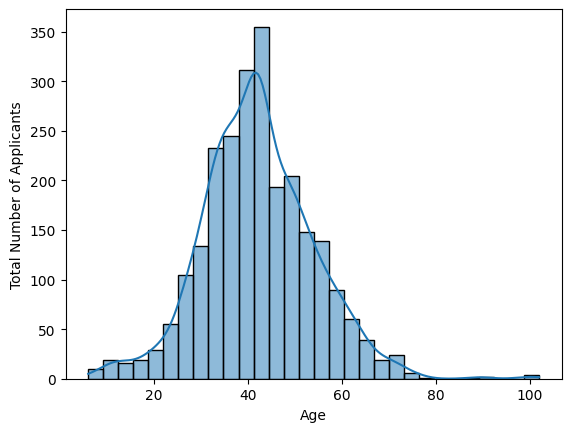

In [82]:
df["Age"]
sns.histplot(df["Age"], bins=30, edgecolor='black' , stat="count", kde=True)
plt.xlabel("Age")
plt.ylabel("Total Number of Applicants")

In [43]:
import matplotlib.pyplot as plt


## <span style="font-size: 20px"> **Visualize top 10 loved and hated candies**

In [44]:
type(df.iloc[:, 6:109].sum(axis=0).to_frame('Popularity_Score'))

pandas.core.frame.DataFrame

In [45]:
Candy_Popurality_df = df.iloc[:, 6:109].sum(axis=0).to_frame('Popularity_Score')

In [50]:
Candy_Popurality_df.sort_values(by='Popularity_Score', ascending=False, inplace=True)
Candy_Popurality_df.reset_index(inplace=True)

In [55]:
Candy_Popurality_df.rename(columns={"index":"Candy"}, inplace=True)

In [56]:
Candy_Popurality_df.head(10)

,Candy,Popularity_Score
0,AnyFullSizedCandyBar,1559
1,ReeseSPeanutButterCups,1498
2,KitKat,1447
3,CashOrOtherFormsOfLegalTender,1439
4,Twix,1413
5,Snickers,1399
6,TolberoneSomethingOrOther,1320
7,PeanutMMS,1291
8,LindtTruffle,1277
9,NestleCrunch,1188


In [ ]:
df.shape[0]  #-> rows 

2460

In [67]:
Candy_Popurality_df["Percentage"] = (Candy_Popurality_df['Popularity_Score'] / df.shape[0] * 100).round(2)

In [68]:
Candy_Popurality_df

,Candy,Popularity_Score,Percentage
0,AnyFullSizedCandyBar,1559,63.37
1,ReeseSPeanutButterCups,1498,60.89
2,KitKat,1447,58.82
3,CashOrOtherFormsOfLegalTender,1439,58.5
4,Twix,1413,57.44
...,...,...,...
98,JoyjoyMitIodine,76,3.09
99,GumFromBaseballCards,44,1.79
100,WhiteBread,44,1.79
101,Restaurant_Candy,39,1.59


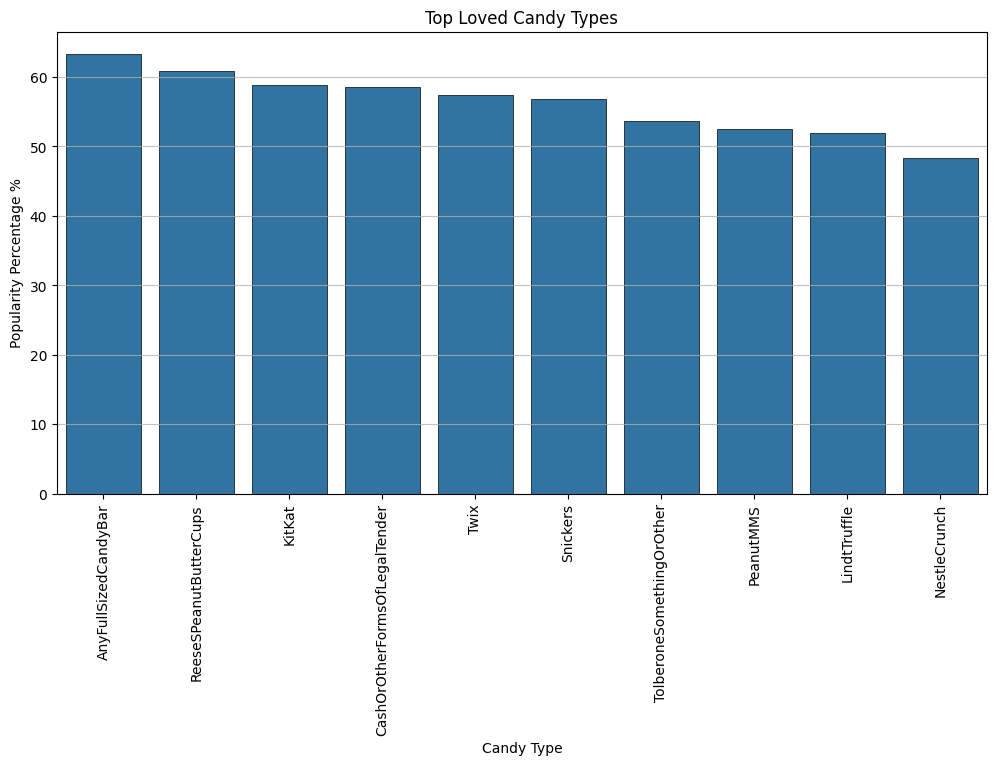

In [ ]:

plt.figure(figsize=(12, 6))
sns.barplot(x="Candy", y='Percentage', data=Candy_Popurality_df.head(10), edgecolor='black', linewidth=0.5)
plt.xticks(rotation=90)
plt.grid(axis='y', alpha=0.75)
plt.xlabel("Candy Type")
plt.ylabel("Popularity Percentage %")
plt.title("Top Loved Candy Types")
plt.show()

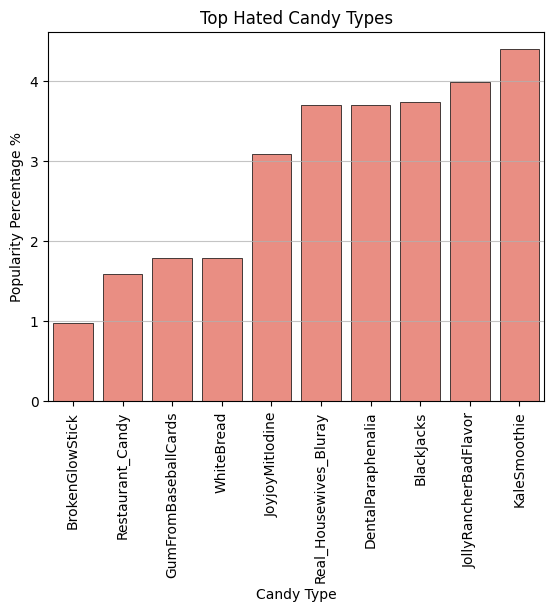

In [77]:
sns.barplot(x= "Candy", y="Percentage", data = Candy_Popurality_df.iloc[-10:, :].sort_values(by='Popularity_Score', ascending=True), edgecolor='black', linewidth=0.5, color="salmon")
plt.grid(axis='y', alpha=0.75)
plt.xticks(rotation=90)
plt.xlabel("Candy Type")
plt.ylabel("Popularity Percentage %")
plt.title("Top Hated Candy Types")
plt.show()